In [106]:
#https://www.kaggle.com/datasets/ashkhagan/palmer-penguins-datasetalternative-iris-dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

dataset = pd.read_csv("C:/Users/Lydian/Desktop/DataSet/penguins.csv")
dataset.replace('NA', np.nan, inplace = True)
dataset.replace(' ', np.nan, inplace = True)
dataset.dropna( inplace = True, how = 'any')

bill_length = dataset["bill_length_mm"]
bill_depth = dataset["bill_depth_mm"]
flipper_length = dataset["flipper_length_mm"]
island = dataset["island"]
sex = dataset["sex"]
species = dataset["species"]



torgersen_adelie_male = dataset.loc[ (dataset['island'] == 'Torgersen') & (dataset['sex'] == 'male') & (dataset['species'] == 'Adelie')]
torgersen_adelie_female = dataset.loc[ (dataset['island'] == 'Torgersen') & (dataset['sex'] == 'female') & (dataset['species'] == 'Adelie')]

biscoe_adelie_male = dataset.loc[ (dataset['island'] == 'Biscoe') & (dataset['sex'] == 'male') & (dataset['species'] == 'Adelie')]
biscoe_adelie_female = dataset.loc[ (dataset['island'] == 'Biscoe') & (dataset['sex'] == 'female') & (dataset['species'] == 'Adelie')]

dream_adelie_male = dataset.loc[ (dataset['island'] == 'Dream') & (dataset['sex'] == 'male') & (dataset['species'] == 'Adelie')]
dream_adelie_female = dataset.loc[ (dataset['island'] == 'Dream') & (dataset['sex'] == 'female') & (dataset['species'] == 'Adelie')]



adeile = dataset.loc[ dataset['species'] == 'Adelie' ]
chinstrap = dataset.loc[ dataset['species'] == 'Chinstrap' ]
gentoo = dataset.loc[ dataset['species'] == 'Gentoo' ]

sns.set(rc={'figure.figsize':(10,6)})


In [107]:
display(dataset)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [96]:
dataset.value_counts()

species  island     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex   
Adelie   Biscoe     34.5            18.1           187.0              2900.0       female    1
Gentoo   Biscoe     44.0            13.6           208.0              4350.0       female    1
                    43.6            13.9           217.0              4900.0       female    1
                    43.5            15.2           213.0              4650.0       female    1
                                    14.2           220.0              4700.0       female    1
                                                                                            ..
Adelie   Torgersen  36.6            17.8           185.0              3700.0       female    1
                    36.2            17.2           187.0              3150.0       female    1
                                    16.1           187.0              3550.0       female    1
                    35.9            16.6           190.

In [63]:
dataset.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [64]:
dataset.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [65]:
dataset.sex.value_counts()

male      168
female    165
Name: sex, dtype: int64

<AxesSubplot:xlabel='island', ylabel='count'>

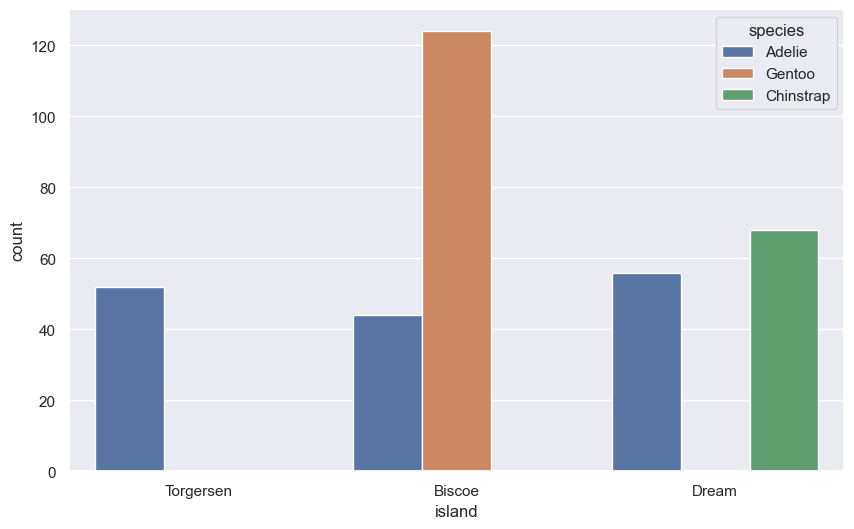

In [66]:
sns.countplot(data=dataset, x='island', hue='species')

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

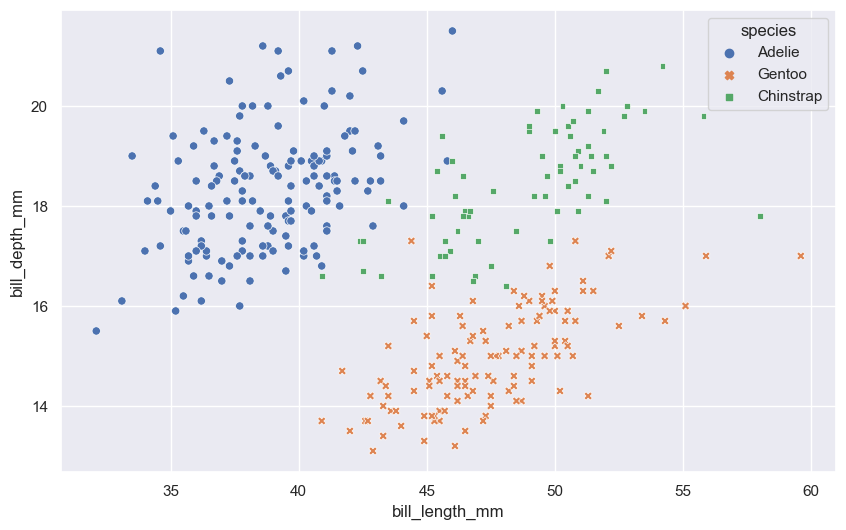

In [67]:
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm',hue='species',data=dataset,style='species')

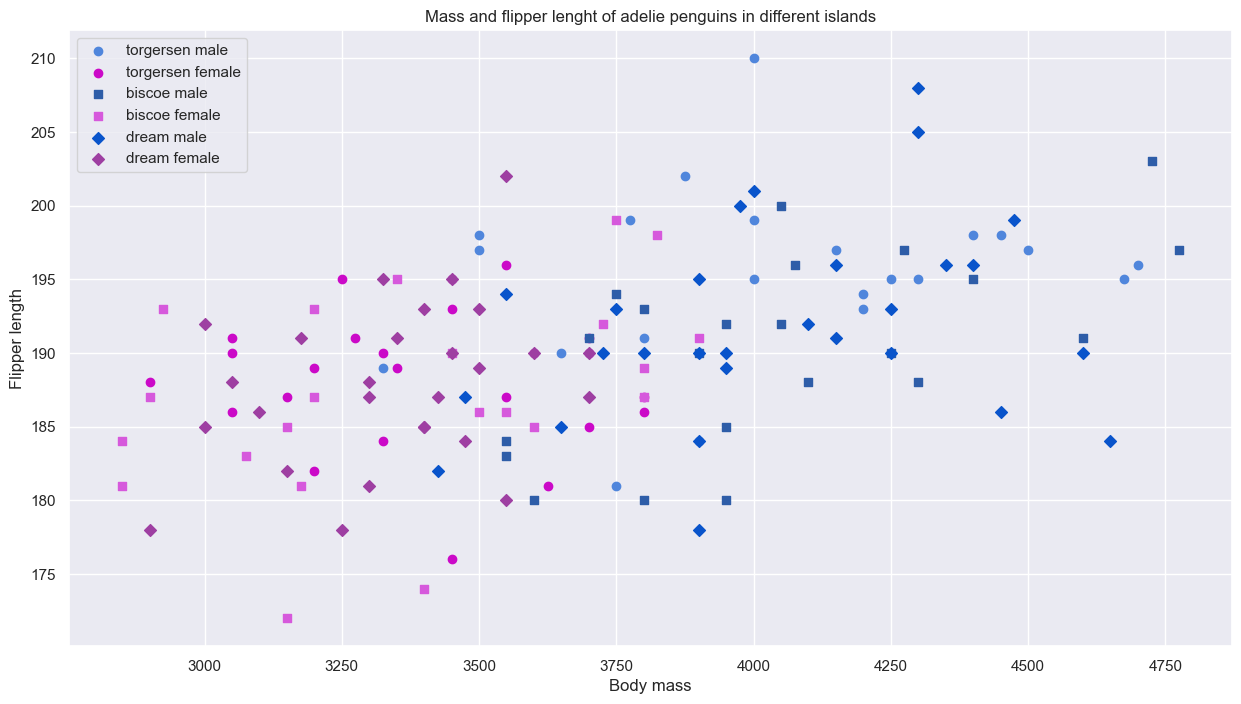

In [8]:
t_mass_m = torgersen_adelie_male["body_mass_g"]
t_mass_f = torgersen_adelie_female["body_mass_g"]
t_flipper_m = torgersen_adelie_male["flipper_length_mm"]
t_flipper_f = torgersen_adelie_female["flipper_length_mm"]

b_mass_m = biscoe_adelie_male["body_mass_g"]
b_mass_f = biscoe_adelie_female["body_mass_g"]
b_flipper_m = biscoe_adelie_male["flipper_length_mm"]
b_flipper_f = biscoe_adelie_female["flipper_length_mm"]

d_mass_m = dream_adelie_male["body_mass_g"]
d_mass_f = dream_adelie_female["body_mass_g"]
d_flipper_m = dream_adelie_male["flipper_length_mm"]
d_flipper_f = dream_adelie_female["flipper_length_mm"]

plt.figure(figsize=(15, 8))
plt.scatter(t_mass_m, t_flipper_m, color = "#5086DC", label = "torgersen male")
plt.scatter(t_mass_f, t_flipper_f, color = "#CB09C8", label = "torgersen female")


plt.scatter(b_mass_m, b_flipper_m, color = "#2E5DA8", label = "biscoe male", marker = 's')
plt.scatter(b_mass_f, b_flipper_f, color = "#D659DC", label = "biscoe female", marker = 's')

plt.scatter(d_mass_m, d_flipper_m, color = "#0954CB", label = "dream male", marker = 'D')
plt.scatter(d_mass_f, d_flipper_f, color = "#9E3FA2", label = "dream female", marker = 'D')



plt.xlabel("Body mass")
plt.ylabel("Flipper length")
plt.title("Mass and flipper lenght of adelie penguins in different islands")
plt.legend()


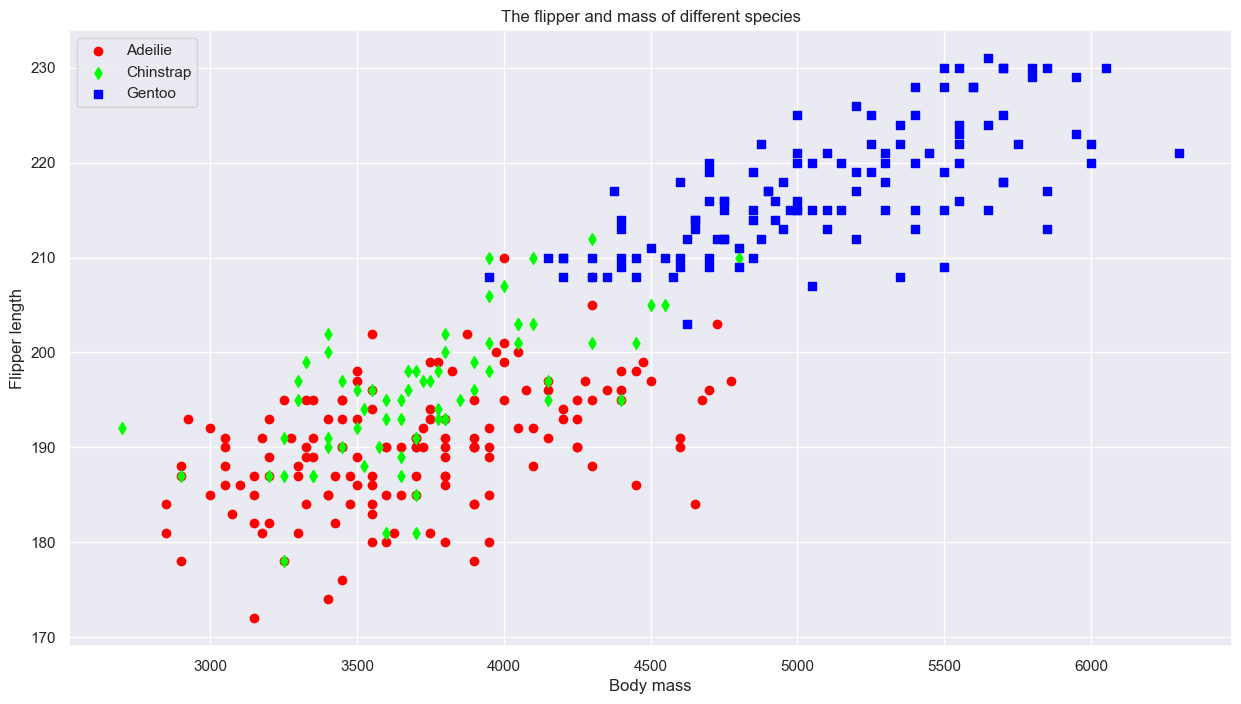

In [9]:
adeile_mass = adeile["body_mass_g"]
adeile_flipper = adeile["flipper_length_mm"]

chinstrap_mass = chinstrap["body_mass_g"]
chinstrap_flipper = chinstrap["flipper_length_mm"]

gentoo_mass = gentoo["body_mass_g"]
gentoo_flipper = gentoo["flipper_length_mm"]


plt.figure(figsize=(15, 8))
plt.scatter(adeile_mass, adeile_flipper, color = "#FF0000", label = "Adeilie")
plt.scatter(chinstrap_mass, chinstrap_flipper, color = "#00FF00", label = "Chinstrap", marker = 'd')
plt.scatter(gentoo_mass, gentoo_flipper, color = "#0000FF", label = "Gentoo", marker = 's')




plt.xlabel("Body mass")
plt.ylabel("Flipper length")
plt.title("The flipper and mass of different species")
plt.legend()


In [112]:
adeilie_bill_length = adeile["bill_length_mm"]
chinstrap_bill_length = chinstrap["bill_length_mm"]
gentoo_bill_length = gentoo["bill_length_mm"]

adeilie_bill_depth = adeile["bill_depth_mm"]
chinstrap_bill_depth = chinstrap["bill_depth_mm"]
gentoo_bill_depth = gentoo["bill_depth_mm"]

x = adeile[["bill_length_mm", "bill_depth_mm"]].dropna();
#x = x[:].values

plt.figure(figsize=(15, 8))
kmeans = KMeans(n_clusters = 2, random_state = 0, n_init='auto')
x.value_counts()
#kmeans.fit(x)
#clusters = kmeans.fit_predict(x)

#plt.scatter(adeilie_bill_length, adeilie_bill_depth, color = "#0000FF", label = "Adeilie", c = x)
#plt.scatter(chinstrap_bill_length, chinstrap_bill_depth, color = "#00FF00", label = "Chinstrap", marker = 'd')
#plt.scatter(gentoo_bill_length, gentoo_bill_depth, color = "#FF0000", label = "Gentoo", marker = 's')



#plt.xlabel("Bill length")
#plt.ylabel("Bill height")
#plt.title("The bill length and depth of each species")
#plt.legend()

TypeError: '<=' not supported between instances of 'str' and 'int'

<Figure size 1500x800 with 0 Axes>

<AxesSubplot:xlabel='bill_depth_mm', ylabel='body_mass_g'>

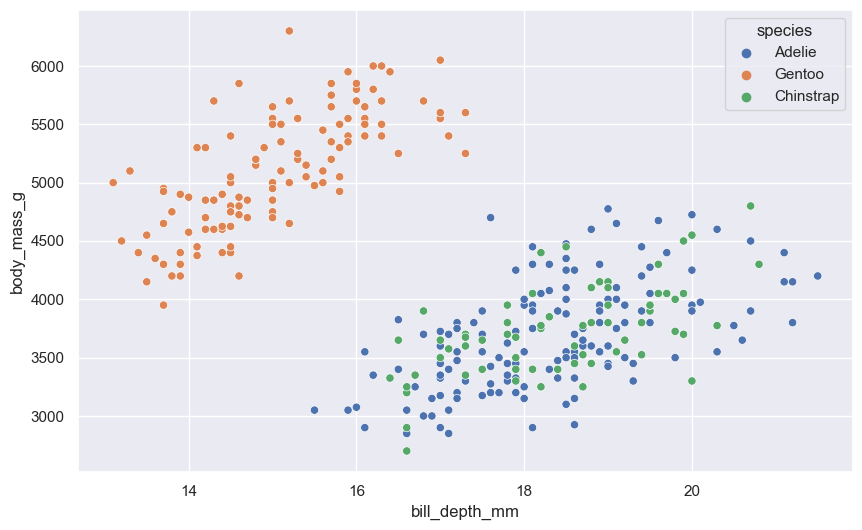

In [11]:
sns.scatterplot(data=dataset, x='bill_depth_mm', y='body_mass_g', hue='species')

<AxesSubplot:xlabel='bill_depth_mm', ylabel='body_mass_g'>

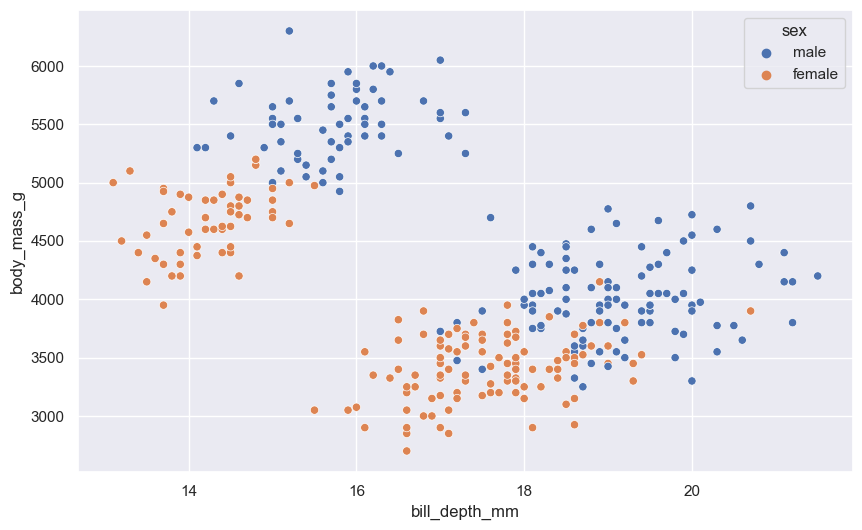

In [12]:

sns.scatterplot(data=dataset, x='bill_depth_mm', y='body_mass_g', hue='sex')

In [13]:
dataset.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000
